In [58]:
import pandas as pd 
import numpy as np

In [59]:
df = pd.read_csv('Data/features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Preprocessing

In [60]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [61]:
# creating a list of labels
df['label']=df['label'].astype('category')
# creating a list of index
df['class_label'] = df['label'].cat.codes

In [62]:
# creating a json type object dictionary to store labels
genre_dict = dict(zip(df.class_label.unique(), df.label.unique()))   
print(genre_dict[0])

blues


In [63]:
df['label'].unique()

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Categories (10, object): ['blues', 'classical', 'country', 'disco', ..., 'metal', 'pop', 'reggae', 'rock']

In [64]:
# removed the output values from the list
cols = list(df.columns)
cols.remove('label')
cols

['filename',
 'length',
 'chroma_stft_mean',
 'chroma_stft_var',
 'rms_mean',
 'rms_var',
 'spectral_centroid_mean',
 'spectral_centroid_var',
 'spectral_bandwidth_mean',
 'spectral_bandwidth_var',
 'rolloff_mean',
 'rolloff_var',
 'zero_crossing_rate_mean',
 'zero_crossing_rate_var',
 'harmony_mean',
 'harmony_var',
 'perceptr_mean',
 'perceptr_var',
 'tempo',
 'mfcc1_mean',
 'mfcc1_var',
 'mfcc2_mean',
 'mfcc2_var',
 'mfcc3_mean',
 'mfcc3_var',
 'mfcc4_mean',
 'mfcc4_var',
 'mfcc5_mean',
 'mfcc5_var',
 'mfcc6_mean',
 'mfcc6_var',
 'mfcc7_mean',
 'mfcc7_var',
 'mfcc8_mean',
 'mfcc8_var',
 'mfcc9_mean',
 'mfcc9_var',
 'mfcc10_mean',
 'mfcc10_var',
 'mfcc11_mean',
 'mfcc11_var',
 'mfcc12_mean',
 'mfcc12_var',
 'mfcc13_mean',
 'mfcc13_var',
 'mfcc14_mean',
 'mfcc14_var',
 'mfcc15_mean',
 'mfcc15_var',
 'mfcc16_mean',
 'mfcc16_var',
 'mfcc17_mean',
 'mfcc17_var',
 'mfcc18_mean',
 'mfcc18_var',
 'mfcc19_mean',
 'mfcc19_var',
 'mfcc20_mean',
 'mfcc20_var',
 'class_label']

### Splitting data for training and testing

In [65]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = df.iloc[:,1:28]
y = df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Min-max Normalization

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Feature importance using Random Forest

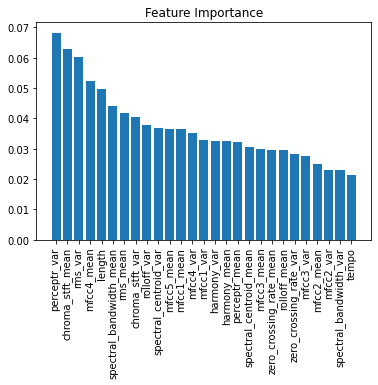

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 0, n_jobs = -1).fit(X_train_scaled,y_train)
importances = clf.feature_importances_
#[::x] selects every value at x distance apart
## argsort returns the sorted indexes of the array
indices =  np.argsort(importances)[::-1]
# list of labels of the features
features = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]),importances[indices])
plt.xticks(range(X.shape[1]),features,rotation=90)
plt.show()

### Feature importance using Decision Tree

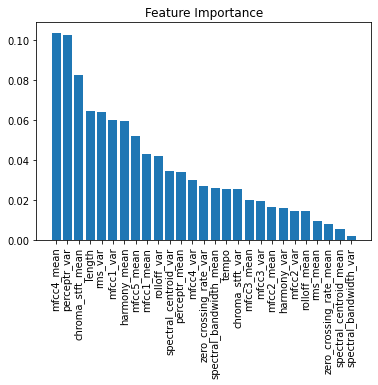

In [68]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

### Fetching file metadata for prediction

In [69]:
test_df = pd.read_csv('Data/test set.csv')
test_df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,Automatic_Teller(Metal).wav,661794,0.472276,0.068043,0.328868,0.000742,2436.997961,74557.062410,2322.447571,32898.95714,...,22.453011,-1.932485,23.373866,-2.266622,21.111026,-6.016707,21.485832,0.404295,20.331105,metal
1,A_Night_In_Tunisia.wav,661794,0.389212,0.085853,0.198375,0.006135,1672.625585,404920.877300,1741.816412,172258.68860,...,91.261609,2.133521,122.966744,0.904816,56.161487,-4.106335,44.813595,-4.778181,68.486442,jazz
2,A_Thousand_Years(Pop).wav,661794,0.305757,0.080404,0.105666,0.000832,2077.288883,427163.110200,2456.309073,254105.24050,...,48.032800,-8.341142,48.896518,-0.506528,35.377095,-10.093406,46.958441,-2.527459,47.267469,pop
3,Beethoven's_5th_Symphony(Classical).wav,661794,0.264400,0.085957,0.028906,0.000659,1319.893050,427200.574800,1568.056110,62944.09990,...,60.257497,-0.840738,60.501465,2.410644,64.407690,2.020258,71.699490,3.961606,82.107269,classical
4,Beethoven_Moonlight_Sonata(Classical).wav,661794,0.183556,0.077236,0.018925,0.000056,666.156117,7302.776523,1124.088135,21718.22926,...,81.123768,1.752388,81.223624,3.056346,84.860450,1.632566,125.267001,3.197324,155.554954,classical


### K-nearest neighbours

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.58

### Prediction using KNN

In [71]:
d1 = test_df.iloc[12,:28]
d1 = d1.drop(['filename'])
data1 = scaler.transform([d1])
genre_prediction = knn.predict(data1)
print(genre_prediction[0])

disco


C:\Users\Vimal\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Accuracy of  SVM

In [72]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C=10).fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.59

### Prediction using SVM

In [73]:
d1 = test_df.iloc[0,:28]
d1 = d1.drop(['filename'])
data1 = scaler.transform([d1])
genre_prediction = clf.predict(data1)
print(genre_prediction[0])

metal


C:\Users\Vimal\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [74]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification
clf =RandomForestClassifier()
clf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [75]:
print(clf.feature_importances_)
output=clf.predict(data1)[0]
print(output)

[0.05195611 0.06625036 0.04320072 0.03794337 0.05064532 0.03058496
 0.04187748 0.04212258 0.0240073  0.03568632 0.03471558 0.02733445
 0.02743634 0.02976735 0.03235954 0.03384055 0.06637515 0.01991543
 0.03475129 0.03674679 0.02177374 0.02326378 0.03189735 0.03093323
 0.0574484  0.03659607 0.03057045]
metal


In [76]:
clf.score(X_test_scaled, y_test)

0.5

### ML Algos
- Linear regression 
- Logistic regression
- Decision tree
- SVM algorithm (done)
- Naive Bayes algorithm
- KNN algorithm (done)
- K-means
- Random forest algorithm (done)
- Dimensionality reduction algorithms
- Gradient boosting algorithm and AdaBoosting algorithm


In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train_scaled,y_train)


ValueError: could not convert string to float: 'pop'